# Data Aggregation and Visualization

### Audhi Aprilliant

## 1 Import Modules

In [1]:
import pandas as pd                   # Dataframe manipulation
import numpy as np                    # Mathematics operation
import seaborn as sns                 # Data visualization with seaborn
import matplotlib.pyplot as plt       # Data visualization with matplotlib
plt.style.use('ggplot')               # Matplotlib with ggplot style
import plotnine as pln                # Data visualization
from plotnine import *                # Data visualization
pln.options.figure_size = (7.8,3.7)   # Size of plotnine figure 

## 2 Load the Data

### 2.1 JCI Data

In [2]:
jci_data = pd.read_csv('Datasets/interim/Clean Data of JCI 2019.csv')

In [3]:
jci_data['Date'] = pd.to_datetime(jci_data['Date'],format = '%Y-%m-%d')
day_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_news = []
for i in range(jci_data.shape[0]):
    c = jci_data['Date'][i].weekday()
    day_news.append(day_name[c])
jci_data.insert(loc=1,column='Day',value = day_news)

In [4]:
print('Dimension of JCI data:\n{}'.format(jci_data.shape[0]),
      'rows and {}'.format(jci_data.shape[1]),'columns')
jci_data.head()

Dimension of JCI data:
371 rows and 10 columns


,Date,Day,Open,High,Low,Close,Adj Close,Volume,Return,Free
0,2018-12-28,Friday,6200.296875,6212.125000,6176.630859,6194.498047,6194.498047,69954900.0,0.000000,1
1,2018-12-29,Saturday,6199.993652,6211.346253,6175.156250,6192.832642,6192.832642,67810262.5,-0.000269,0
2,2018-12-30,Sunday,6199.690430,6210.567505,6173.681640,6191.167237,6191.167237,65665625.0,-0.000539,0
3,2018-12-31,Monday,6199.083985,6209.010010,6170.732422,6187.836426,6187.836426,61376350.0,-0.001078,0
4,2019-01-01,Tuesday,6198.477539,6207.452515,6167.783203,6184.505616,6184.505616,57087075.0,-0.001617,0


In [5]:
jci_data.tail()

,Date,Day,Open,High,Low,Close,Adj Close,Volume,Return,Free
366,2019-12-29,Sunday,6325.351807,6337.127930,6300.963867,6314.426514,6314.426514,44828800.0,-0.001583,0
367,2019-12-30,Monday,6329.134766,6336.919922,6289.546875,6299.539063,6299.539063,47557400.0,-0.004727,1
368,2019-12-31,Tuesday,6325.133057,6331.943237,6283.079102,6295.549561,6295.549561,43928975.0,-0.004180,0
369,2020-01-01,Wednesday,6321.131348,6326.966553,6276.611328,6291.560059,6291.560059,40300550.0,-0.003633,0
370,2020-01-02,Thursday,6313.127930,6317.013184,6263.675781,6283.581055,6283.581055,33043700.0,-0.002540,1


In [6]:
jci_data.isna().sum()

Date         0
Day          0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
Free         0
dtype: int64

### 2.2 Financial News Data

In [7]:
news_data = pd.read_csv('Datasets/interim/Aggregation Data of Financial News.csv')
print('Dimension of financial news data:\n{}'.format(news_data.shape[0]),
      'rows and {}'.format(news_data.shape[1]),'columns')
news_data.head()

Dimension of financial news data:
365 rows and 28 columns


,date,date_format,day,month,num_pos_okezone,num_neg_okezone,num_net_okezone,total_okezone,num_pos_okezone_jci,num_neg_okezone_jci,...,num_net_kompas_jci,total_kompas_jci,num_pos_detik,num_neg_detik,num_net_detik,total_detik,num_pos_detik_jci,num_neg_detik_jci,num_net_detik_jci,total_detik_jci
0,01 Januari 2019,2019-01-01,Tuesday,Januari,9.0,1.0,2.0,12.0,1.0,0.0,...,0.0,0.0,3.0,1.0,4.0,8.0,0.0,0.0,0.0,0.0
1,02 Januari 2019,2019-01-02,Wednesday,Januari,20.0,12.0,1.0,33.0,3.0,2.0,...,0.0,1.0,17.0,10.0,5.0,32.0,3.0,2.0,0.0,5.0
2,03 Januari 2019,2019-01-03,Thursday,Januari,23.0,7.0,3.0,33.0,3.0,1.0,...,0.0,0.0,12.0,5.0,6.0,23.0,4.0,0.0,0.0,4.0
3,04 Januari 2019,2019-01-04,Friday,Januari,26.0,8.0,3.0,37.0,2.0,1.0,...,0.0,0.0,22.0,9.0,5.0,36.0,3.0,1.0,0.0,4.0
4,05 Januari 2019,2019-01-05,Saturday,Januari,10.0,3.0,1.0,14.0,0.0,0.0,...,0.0,0.0,7.0,3.0,1.0,11.0,0.0,0.0,0.0,0.0


In [8]:
news_data.tail()

,date,date_format,day,month,num_pos_okezone,num_neg_okezone,num_net_okezone,total_okezone,num_pos_okezone_jci,num_neg_okezone_jci,...,num_net_kompas_jci,total_kompas_jci,num_pos_detik,num_neg_detik,num_net_detik,total_detik,num_pos_detik_jci,num_neg_detik_jci,num_net_detik_jci,total_detik_jci
360,27 Desember 2019,2019-12-27,Friday,Desember,11.0,8.0,3.0,22.0,4.0,0.0,...,0.0,0.0,14.0,11.0,14.0,39.0,5.0,0.0,0.0,5.0
361,28 Desember 2019,2019-12-28,Saturday,Desember,0.0,5.0,0.0,5.0,0.0,0.0,...,0.0,0.0,3.0,5.0,9.0,17.0,1.0,0.0,1.0,2.0
362,29 Desember 2019,2019-12-29,Sunday,Desember,2.0,1.0,1.0,4.0,1.0,0.0,...,0.0,0.0,1.0,3.0,8.0,12.0,0.0,0.0,0.0,0.0
363,30 Desember 2019,2019-12-30,Monday,Desember,9.0,4.0,3.0,16.0,2.0,3.0,...,1.0,2.0,12.0,13.0,12.0,37.0,2.0,6.0,0.0,8.0
364,31 Desember 2019,2019-12-31,Tuesday,Desember,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
news_data.isna().sum()

date                   0
date_format            0
day                    0
month                  0
num_pos_okezone        0
num_neg_okezone        0
num_net_okezone        0
total_okezone          0
num_pos_okezone_jci    0
num_neg_okezone_jci    0
num_net_okezone_jci    0
total_okezone_jci      0
num_pos_kompas         0
num_neg_kompas         0
num_net_kompas         0
total_kompas           0
num_pos_kompas_jci     0
num_neg_kompas_jci     0
num_net_kompas_jci     0
total_kompas_jci       0
num_pos_detik          0
num_neg_detik          0
num_net_detik          0
total_detik            0
num_pos_detik_jci      0
num_neg_detik_jci      0
num_net_detik_jci      0
total_detik_jci        0
dtype: int64

## 3 Merge the Data

In [10]:
# Subsetting JCI data
subset_jci = jci_data.iloc[4:367][['Return','Free']]
subset_jci.reset_index(drop=True,inplace=True)

In [11]:
df_full = pd.concat([news_data,subset_jci],axis=1)

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 30 columns):
date                   365 non-null object
date_format            365 non-null object
day                    365 non-null object
month                  365 non-null object
num_pos_okezone        365 non-null float64
num_neg_okezone        365 non-null float64
num_net_okezone        365 non-null float64
total_okezone          365 non-null float64
num_pos_okezone_jci    365 non-null float64
num_neg_okezone_jci    365 non-null float64
num_net_okezone_jci    365 non-null float64
total_okezone_jci      365 non-null float64
num_pos_kompas         365 non-null float64
num_neg_kompas         365 non-null float64
num_net_kompas         365 non-null float64
total_kompas           365 non-null float64
num_pos_kompas_jci     365 non-null float64
num_neg_kompas_jci     365 non-null float64
num_net_kompas_jci     365 non-null float64
total_kompas_jci       365 non-null float64
num_pos_detik      

In [13]:
# Copy of full data for calculating percentage of sentiment
df_full_raw = df_full.copy()

In [14]:
df_full_raw.head()

,date,date_format,day,month,num_pos_okezone,num_neg_okezone,num_net_okezone,total_okezone,num_pos_okezone_jci,num_neg_okezone_jci,...,num_pos_detik,num_neg_detik,num_net_detik,total_detik,num_pos_detik_jci,num_neg_detik_jci,num_net_detik_jci,total_detik_jci,Return,Free
0,01 Januari 2019,2019-01-01,Tuesday,Januari,9.0,1.0,2.0,12.0,1.0,0.0,...,3.0,1.0,4.0,8.0,0.0,0.0,0.0,0.0,-0.001617,0.0
1,02 Januari 2019,2019-01-02,Wednesday,Januari,20.0,12.0,1.0,33.0,3.0,2.0,...,17.0,10.0,5.0,32.0,3.0,2.0,0.0,5.0,-0.002155,1.0
2,03 Januari 2019,2019-01-03,Thursday,Januari,23.0,7.0,3.0,33.0,3.0,1.0,...,12.0,5.0,6.0,23.0,4.0,0.0,0.0,4.0,0.006403,1.0
3,04 Januari 2019,2019-01-04,Friday,Januari,26.0,8.0,3.0,37.0,2.0,1.0,...,22.0,9.0,5.0,36.0,3.0,1.0,0.0,4.0,0.008531,1.0
4,05 Januari 2019,2019-01-05,Saturday,Januari,10.0,3.0,1.0,14.0,0.0,0.0,...,7.0,3.0,1.0,11.0,0.0,0.0,0.0,0.0,0.006903,0.0


In [15]:
# Preprocessing of Okezone
df_full['num_pos_okezone'] = df_full['num_pos_okezone']/df_full['total_okezone']
df_full['num_neg_okezone'] = df_full['num_neg_okezone']/df_full['total_okezone']
df_full['num_pos_okezone_jci'] = df_full['num_pos_okezone_jci']/df_full['total_okezone_jci']
df_full['num_neg_okezone_jci'] = df_full['num_neg_okezone_jci']/df_full['total_okezone_jci']
# Preprocessing of Kompas
df_full['num_pos_kompas'] = df_full['num_pos_kompas']/df_full['total_kompas']
df_full['num_neg_kompas'] = df_full['num_neg_kompas']/df_full['total_kompas']
df_full['num_pos_kompas_jci'] = df_full['num_pos_kompas_jci']/df_full['total_kompas_jci']
df_full['num_neg_kompas_jci'] = df_full['num_neg_kompas_jci']/df_full['total_kompas_jci']
# Preprocessing of Detik
df_full['num_pos_detik'] = df_full['num_pos_detik']/df_full['total_detik']
df_full['num_neg_detik'] = df_full['num_neg_detik']/df_full['total_detik']
df_full['num_pos_detik_jci'] = df_full['num_pos_detik_jci']/df_full['total_detik_jci']
df_full['num_neg_detik_jci'] = df_full['num_neg_detik_jci']/df_full['total_detik_jci']

In [16]:
# Drop neutral sentiment
df_full = df_full.drop(['num_net_okezone','num_net_okezone_jci',
                        'num_net_kompas','num_net_kompas_jci',
                        'num_net_detik','num_net_detik_jci'],axis=1)

In [17]:
df_full.head()

,date,date_format,day,month,num_pos_okezone,num_neg_okezone,total_okezone,num_pos_okezone_jci,num_neg_okezone_jci,total_okezone_jci,...,num_neg_kompas_jci,total_kompas_jci,num_pos_detik,num_neg_detik,total_detik,num_pos_detik_jci,num_neg_detik_jci,total_detik_jci,Return,Free
0,01 Januari 2019,2019-01-01,Tuesday,Januari,0.750000,0.083333,12.0,1.00,0.00,1.0,...,NaN,0.0,0.375000,0.125000,8.0,NaN,NaN,0.0,-0.001617,0.0
1,02 Januari 2019,2019-01-02,Wednesday,Januari,0.606061,0.363636,33.0,0.60,0.40,5.0,...,0.0,1.0,0.531250,0.312500,32.0,0.60,0.40,5.0,-0.002155,1.0
2,03 Januari 2019,2019-01-03,Thursday,Januari,0.696970,0.212121,33.0,0.75,0.25,4.0,...,NaN,0.0,0.521739,0.217391,23.0,1.00,0.00,4.0,0.006403,1.0
3,04 Januari 2019,2019-01-04,Friday,Januari,0.702703,0.216216,37.0,0.50,0.25,4.0,...,NaN,0.0,0.611111,0.250000,36.0,0.75,0.25,4.0,0.008531,1.0
4,05 Januari 2019,2019-01-05,Saturday,Januari,0.714286,0.214286,14.0,NaN,NaN,0.0,...,NaN,0.0,0.636364,0.272727,11.0,NaN,NaN,0.0,0.006903,0.0


In [18]:
df_full.isna().sum()

date                     0
date_format              0
day                      0
month                    0
num_pos_okezone          2
num_neg_okezone          2
total_okezone            0
num_pos_okezone_jci    103
num_neg_okezone_jci    103
total_okezone_jci        0
num_pos_kompas           5
num_neg_kompas           5
total_kompas             0
num_pos_kompas_jci     318
num_neg_kompas_jci     318
total_kompas_jci         0
num_pos_detik            2
num_neg_detik            2
total_detik              0
num_pos_detik_jci      114
num_neg_detik_jci      114
total_detik_jci          0
Return                   2
Free                     2
dtype: int64

In [19]:
# Handle NaN data
df_full = df_full.fillna(0)

In [20]:
df_full.isna().sum()

date                   0
date_format            0
day                    0
month                  0
num_pos_okezone        0
num_neg_okezone        0
total_okezone          0
num_pos_okezone_jci    0
num_neg_okezone_jci    0
total_okezone_jci      0
num_pos_kompas         0
num_neg_kompas         0
total_kompas           0
num_pos_kompas_jci     0
num_neg_kompas_jci     0
total_kompas_jci       0
num_pos_detik          0
num_neg_detik          0
total_detik            0
num_pos_detik_jci      0
num_neg_detik_jci      0
total_detik_jci        0
Return                 0
Free                   0
dtype: int64

In [21]:
# Save the full data with calculation of sentiment percentages
df_full.to_csv('Datasets/interim/Data NLFF for Modelling.csv',index=False)

## 4 Data Visualization

### 4.1 Correlation of All Variables

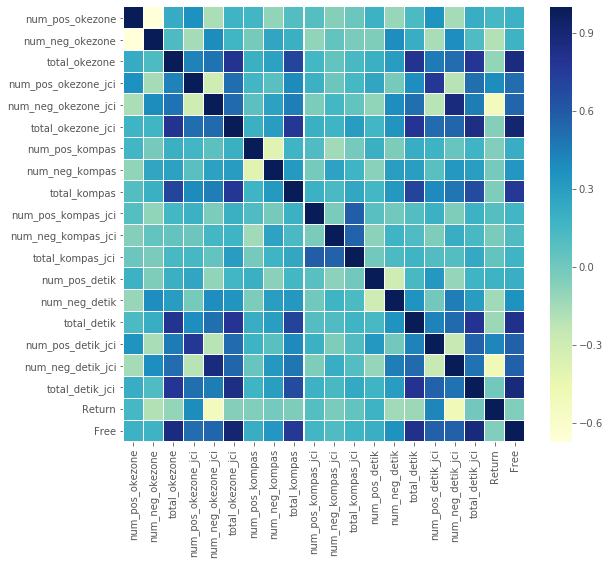

In [22]:
corrmat = df_full.corr() # For calculating correlation
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap='YlGnBu',linewidths = 0.1)

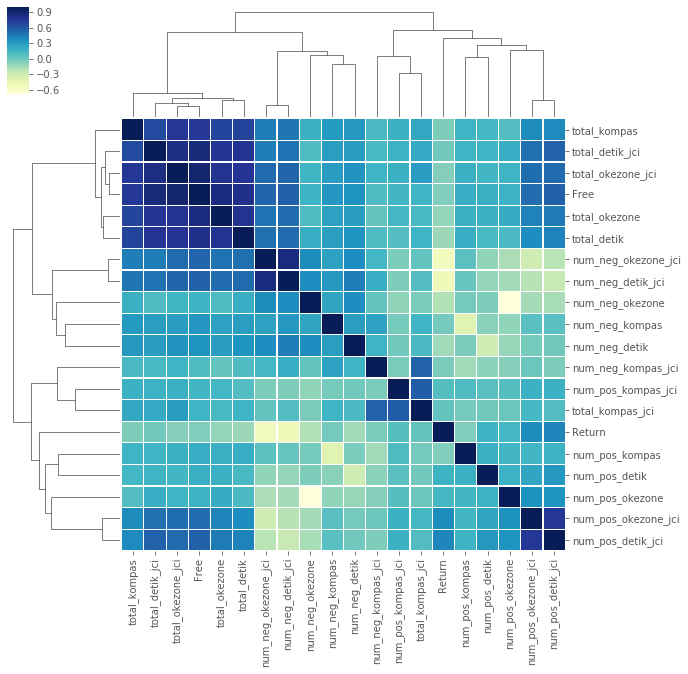

In [23]:
corrmat = df_full.corr()
cg = sns.clustermap(corrmat,cmap ='YlGnBu',linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0)
cg

### 4.2 Time Series Plot of the Return

In [34]:
# Drop data in Saturday and Sunday
df_full_weekday = df_full[df_full['Free'] == 1]
df_full_weekday = df_full_weekday.drop(['Free'],axis=1)

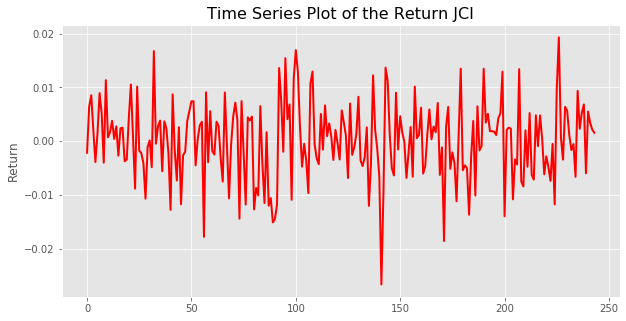

In [35]:
# Using matplotlib
plt.figure(figsize=(10,5))                                      # Set image size
ax=sns.lineplot(x=range(df_full_weekday.shape[0]),y='Return',
                data=df_full_weekday,color='red',linewidth=2)   # Expression for figure
plt.title('Time Series Plot of the Return JCI',fontsize=16)     # Title of figure
plt.show()                                                      # Show the figure

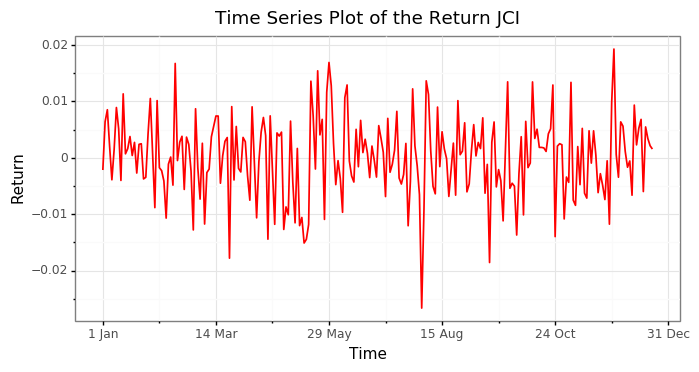

<ggplot: (-9223363290929874786)>

In [36]:
# Using plotnine
(ggplot(df_full_weekday)
 + geom_line(aes(x = range(df_full_weekday.shape[0]),
                 y = 'Return'),
             size = 0.7,
             color = 'red')
 + labs(title = 'Time Series Plot of the Return JCI',
        x = 'Time')
 + scale_x_continuous(labels = ['1 Jan','14 Mar','29 May','15 Aug','24 Oct','31 Dec'])
 + theme_bw()
)

### 4.3 Box and Whisker Plot of Daily Return of JCI

In [37]:
# Aggregating data according to day variable
df_return_daily = df_full_weekday.groupby(by=['day'],as_index = False).agg({'Return':'mean'})
# Order the rows
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_return_daily['day'] = pd.Categorical(df_return_daily['day'],categories = cats,ordered = True)
df_return_daily.sort_values('day',ascending = True)

,day,Return
1,Monday,-0.001833
3,Tuesday,0.001331
4,Wednesday,0.000446
2,Thursday,-0.000307
0,Friday,0.000743


In [38]:
# Create dataframe for summary, first
df_return_sum_daily = df_full_weekday[['day','Return']].groupby(by=['day'],as_index = False).describe()
# Reindex
df_return_sum_daily = df_return_sum_daily.iloc[[1,3,4,2,0]]
# Rename the day
date_weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
df_return_sum_daily.insert(loc=0,column='Day',value=date_weekday)
df_return_sum_daily

Day Return                                                    \
              count      mean       std       min       25%       50%   
1     Monday   50.0 -0.001833  0.008545 -0.026633 -0.004998 -0.003011   
3    Tuesday   48.0  0.001331  0.006657 -0.011176 -0.004045  0.002553   
4  Wednesday   47.0  0.000446  0.005878 -0.015101 -0.002518  0.000375   
2   Thursday   49.0 -0.000307  0.007499 -0.014442 -0.006170  0.000995   
0     Friday   50.0  0.000743  0.006555 -0.013963 -0.003202  0.001374   

                       
        75%       max  
1  0.003158  0.019286  
3  0.005900  0.013379  
4  0.003135  0.013656  
2  0.003946  0.015426  
0  0.004753  0.016912

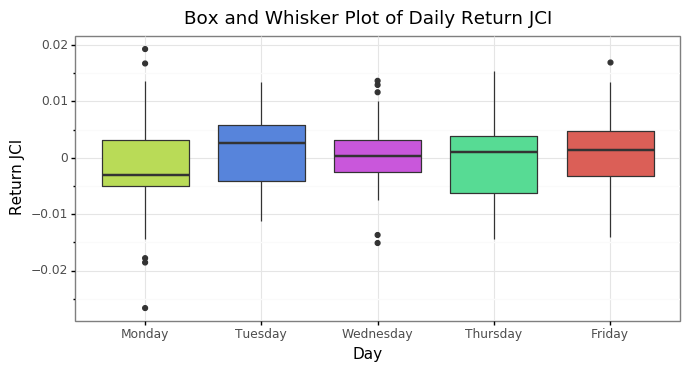

<ggplot: (8745914098254)>

In [39]:
(ggplot(df_full_weekday)
 + geom_boxplot(aes(x = 'day',
                    y = 'Return',
                    fill = 'day'),
                show_legend = False)
 + labs(title = 'Box and Whisker Plot of Daily Return JCI',
        x = 'Day',
        y = 'Return JCI')
 + xlim(date_weekday)
 + theme_bw()
)

### 4.4 Box and Whisker Plot of Monthly Return of JCI

In [40]:
# Aggregating data according to day variable
df_return_monthly = df_full_weekday.groupby(by=['month'],as_index = False).agg({'Return':'mean'})
# Order the rows
cats = ['Januari','Februari','Maret','April','Mei','Juni',
        'Juli','Agustus','September','Oktober','November','Desember']
df_return_monthly['month'] = pd.Categorical(df_return_monthly['month'],categories = cats,ordered = True)
df_return_monthly.sort_values('month',ascending = True)

,month,Return
4,Januari,0.002405
3,Februari,-0.000750
7,Maret,0.000174
1,April,-0.000131
8,Mei,-0.001910
6,Juni,0.001563
5,Juli,0.000204
0,Agustus,-0.000479
11,September,-0.001238
10,Oktober,0.000390


In [41]:
# Create dataframe for summary, first
df_return_sum_monthly = df_full_weekday[['month','Return']].groupby(by=['month'],as_index = False).describe()
# Reindex
df_return_sum_monthly = df_return_sum_monthly.iloc[[4,3,7,1,8,6,5,0,11,10,9,2]]
# Rename the day
df_return_sum_monthly.insert(loc=0,column='Month',value=cats)
df_return_sum_monthly

Month Return                                                    \
               count      mean       std       min       25%       50%   
4     Januari   22.0  0.002405  0.004695 -0.004001 -0.001513  0.002206   
3    Februari   19.0 -0.000750  0.006899 -0.012778 -0.004473 -0.001123   
7       Maret   20.0  0.000174  0.007005 -0.017785 -0.002939  0.001479   
1       April   19.0 -0.000131  0.006832 -0.014416 -0.002843  0.002858   
8         Mei   21.0 -0.001910  0.010900 -0.015101 -0.011518 -0.004325   
6        Juni   15.0  0.001563  0.006794 -0.009650 -0.003429 -0.000493   
5        Juli   23.0  0.000204  0.005326 -0.012036 -0.003455  0.000816   
0     Agustus   22.0 -0.000479  0.008636 -0.026633 -0.006047  0.000199   
11  September   21.0 -0.001238  0.006932 -0.018556 -0.005151 -0.001157   
10    Oktober   23.0  0.000390  0.007224 -0.013963 -0.002265  0.001852   
9    November   21.0 -0.001706  0.006422 -0.011755 -0.006266 -0.003403   
2    Desember   18.0  0.002838  0.005994 -0.006630 -0.000257  0.002220   

                        
         75%       max  
4   0.004933  0.011339  
3   0.002583  0.016733  
7   0.005563  0.009080  
1   0.004485  0.009039  
8   0.006824  0.016912  
6   0.005853  0.012925  
5   0.002930  0.012225  
0   0.004122  0.013656  
11  0.002729  0.013471  
10  0.004004  0.013456  
9   0.002001  0.013379  
2   0.005583  0.019286

In [43]:
# Change categories of the month
df_full_weekday['month'] = ['Jan' if x == 'Januari' else 'Feb' if x == 'Februari' else 
                            'Mar' if x == 'Maret' else 'Apr' if x == 'April' else 
                            'May' if x == 'Mei' else 'Jun' if x == 'Juni' else
                            'Jul' if x == 'Juli' else 'Aug' if x == 'Agustus' else 
                            'Sep' if x == 'September' else 'Oct' if x == 'Oktober' else 
                            'Nov' if x == 'November' else 'Dec' for x in df_full_weekday['month']]

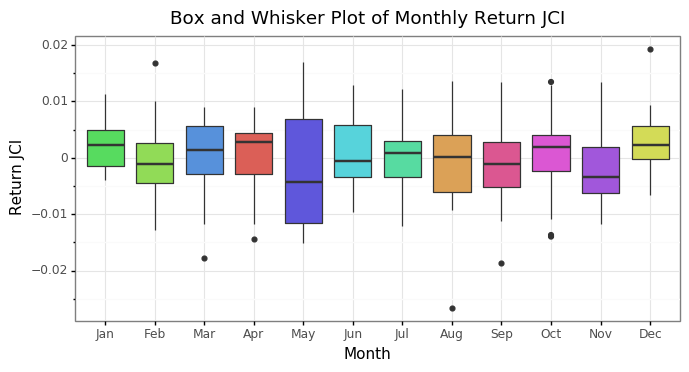

<ggplot: (8745914145130)>

In [44]:
cats_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
(ggplot(df_full_weekday)
 + geom_boxplot(aes(x = 'month',
                    y = 'Return',
                    fill = 'month'),
                show_legend = False)
 + labs(title = 'Box and Whisker Plot of Monthly Return JCI',
        x = 'Month',
        y = 'Return JCI')
 + xlim(cats_month)
 + theme_bw()
)

### 4.5 Box and Whisker Plot of Monthly News Sentiment

In [59]:
df_full['month'] = ['Jan' if x == 'Januari' else 'Feb' if x == 'Februari' else 
                    'Mar' if x == 'Maret' else 'Apr' if x == 'April' else 
                    'May' if x == 'Mei' else 'Jun' if x == 'Juni' else
                    'Jul' if x == 'Juli' else 'Aug' if x == 'Agustus' else 
                    'Sep' if x == 'September' else 'Oct' if x == 'Oktober' else 
                    'Nov' if x == 'November' else 'Dec' for x in df_full['month']]

In [60]:
date = list(df_full['date'])*3    # List of triple date
day = list(df_full['day'])*3      # List of triple day
month = list(df_full['month'])*3  # List of triple month
# List of triple positive sentiment
pos = pd.concat([df_full['num_pos_okezone'],df_full['num_pos_kompas'],df_full['num_pos_detik']],axis=0)
# List of triple negative sentiment
neg = pd.concat([df_full['num_neg_okezone'],df_full['num_neg_kompas'],df_full['num_neg_detik']],axis=0)
# List of triple news names
news = pd.concat([pd.Series(['Okezone']*df_full.shape[0]),
                  pd.Series(['Kompas']*df_full.shape[0]),
                  pd.Series(['Detik']*df_full.shape[0])],axis=0)
# Concatenate all list
df_long_df_full = pd.concat([pd.Series(date,name='date'),pd.Series(day,name='day'),pd.Series(month,name='month'),
                             pos.reset_index(drop=True),neg.reset_index(drop=True),news.reset_index(drop=True)],
                             axis=1)

In [61]:
df_long_df_full.columns = ['date','day','month','pos','neg','news']

In [62]:
# Data manipulation
df_long_df_full['neg'] = -100*df_long_df_full['neg']
df_long_df_full['pos'] = 100*df_long_df_full['pos']

In [63]:
df_long_df_full.head()

,date,day,month,pos,neg,news
0,01 Januari 2019,Tuesday,Jan,75.000000,-8.333333,Okezone
1,02 Januari 2019,Wednesday,Jan,60.606061,-36.363636,Okezone
2,03 Januari 2019,Thursday,Jan,69.696970,-21.212121,Okezone
3,04 Januari 2019,Friday,Jan,70.270270,-21.621622,Okezone
4,05 Januari 2019,Saturday,Jan,71.428571,-21.428571,Okezone


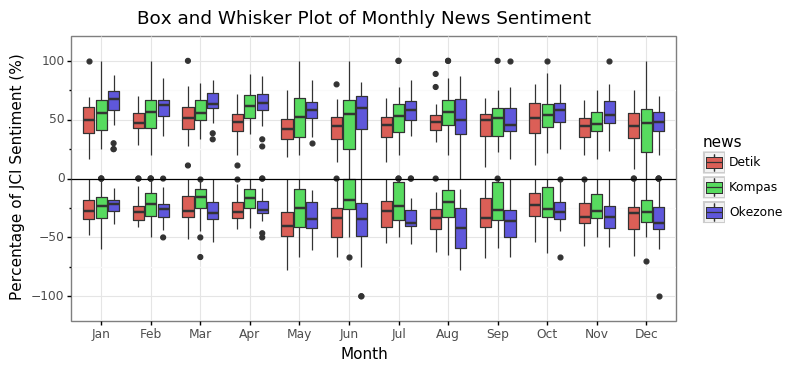

<ggplot: (-9223363290939681483)>

In [64]:
(ggplot(df_long_df_full)
 + geom_boxplot(aes(x = 'month',
                    y = 'pos',
                    fill = 'news'))
 + geom_boxplot(aes(x = 'month',
                    y = 'neg',
                    fill = 'news'))
 + geom_hline(yintercept = 0)
 + labs(title = 'Box and Whisker Plot of Monthly News Sentiment')
 + ylab('Percentage of JCI Sentiment (%)')
 + xlab('Month')
 + ylim([-110,110])
 + xlim(cats_month)
 + theme_bw()
)

### 4.6 Box and Whisker Plot of Daily News Sentiment

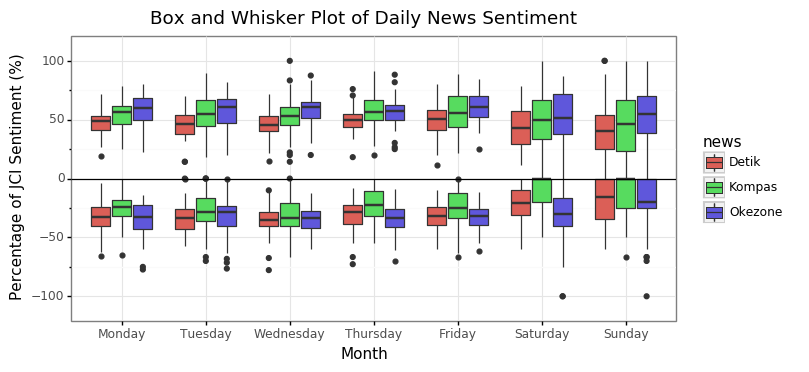

<ggplot: (-9223363290940225634)>

In [67]:
(ggplot(df_long_df_full)
 + geom_boxplot(aes(x = 'day',
                    y = 'pos',
                    fill = 'news'))
 + geom_boxplot(aes(x = 'day',
                    y = 'neg',
                    fill = 'news'))
 + geom_hline(yintercept = 0)
 + labs(title = 'Box and Whisker Plot of Daily News Sentiment')
 + ylab('Percentage of JCI Sentiment (%)')
 + xlab('Month')
 + ylim([-110,110])
 + xlim(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
 + theme_bw()
)

### 4.7 Stacked Barplot of Daily Sentiment

In [68]:
df_full_raw['month'] = ['Jan' if x == 'Januari' else 'Feb' if x == 'Februari' else 
                        'Mar' if x == 'Maret' else 'Apr' if x == 'April' else 
                        'May' if x == 'Mei' else 'Jun' if x == 'Juni' else
                        'Jul' if x == 'Juli' else 'Aug' if x == 'Agustus' else 
                        'Sep' if x == 'September' else 'Oct' if x == 'Oktober' else 
                        'Nov' if x == 'November' else 'Dec' for x in df_full_raw['month']]

In [87]:
date = list(df_full_raw['date'])*3    # List of triple date
day = list(df_full_raw['day'])*3      # List of triple day
month = list(df_full_raw['month'])*3  # List of triple month
# List of triple positive sentiment
pos = pd.concat([df_full_raw['num_pos_okezone'],df_full_raw['num_pos_kompas'],df_full_raw['num_pos_detik']],axis=0)
# List of triple negative sentiment
neg = pd.concat([df_full_raw['num_neg_okezone'],df_full_raw['num_neg_kompas'],df_full_raw['num_neg_detik']],axis=0)
# List of triple total sentiment
total = pd.concat([df_full_raw['total_okezone'],df_full_raw['total_kompas'],df_full_raw['total_detik']],axis=0)
# List of triple news names
news = pd.concat([pd.Series(['Okezone']*df_full_raw.shape[0]),
                  pd.Series(['Kompas']*df_full_raw.shape[0]),
                  pd.Series(['Detik']*df_full_raw.shape[0])],axis=0)
# Concatenate all list
df_long_df_full_raw = pd.concat([pd.Series(date,name='date'),pd.Series(day,name='day'),
                                 pd.Series(month,name='month'),pos.reset_index(drop=True),
                                 neg.reset_index(drop=True),total.reset_index(drop=True),
                                 news.reset_index(drop=True)],axis=1)

In [88]:
df_long_df_full_raw.columns = ['date','day','month','pos','neg','total','news']

In [89]:
net_data = df_long_df_full_raw['total']-(df_long_df_full_raw['pos']+df_long_df_full_raw['neg'])
df_long_df_full_raw.insert(loc=4,column='net',value = net_data)

#### Okezone

In [182]:
df_long_df_full_raw_okezone = df_long_df_full_raw[df_long_df_full_raw['news'] == 'Okezone']

In [183]:
# Aggregating data according to day variable
agg_data_okezone = df_long_df_full_raw_okezone.groupby(by=['day'],
                                                       as_index = False)['pos','neg','net','total'].agg('sum')

In [184]:
agg_data_okezone.columns = ['Day','Positive','Negative','Neutral','Total']

In [185]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
agg_data_okezone['Day'] = pd.Categorical(agg_data_kompas['Day'],categories=cats,ordered = True)
agg_data_okezone.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,793.0,456.0,94.0,1343.0
5,Tuesday,808.0,441.0,122.0,1371.0
6,Wednesday,809.0,485.0,95.0,1389.0
4,Thursday,827.0,481.0,129.0,1437.0
0,Friday,843.0,447.0,91.0,1381.0
2,Saturday,281.0,153.0,88.0,522.0
3,Sunday,171.0,64.0,75.0,310.0


In [186]:
# Ratio of sentiments
agg_data_okezone['Positive'] = agg_data_okezone['Positive']/agg_data_okezone['Total']
agg_data_okezone['Negative'] = agg_data_okezone['Negative']/agg_data_okezone['Total']
agg_data_okezone['Neutral'] = agg_data_okezone['Neutral']/agg_data_okezone['Total']
agg_data_okezone.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,0.590469,0.339538,0.069993,1343.0
5,Tuesday,0.589351,0.321663,0.088986,1371.0
6,Wednesday,0.582433,0.349172,0.068395,1389.0
4,Thursday,0.575505,0.334725,0.089770,1437.0
0,Friday,0.610427,0.323678,0.065894,1381.0
2,Saturday,0.538314,0.293103,0.168582,522.0
3,Sunday,0.551613,0.206452,0.241935,310.0


In [187]:
# Melting the data
agg_data_okezone = agg_data_okezone.drop(['Total'],axis=1)                    # Drop variable of 'total'
long_okezone = pd.melt(agg_data_okezone,id_vars='Day',var_name='Sentiment')   # Melt
long_okezone['value'] = round(long_okezone['value'],2)                        # Round the value
long_okezone.head()

,Day,Sentiment,value
0,Friday,Positive,0.61
1,Monday,Positive,0.59
2,Saturday,Positive,0.54
3,Sunday,Positive,0.55
4,Thursday,Positive,0.58


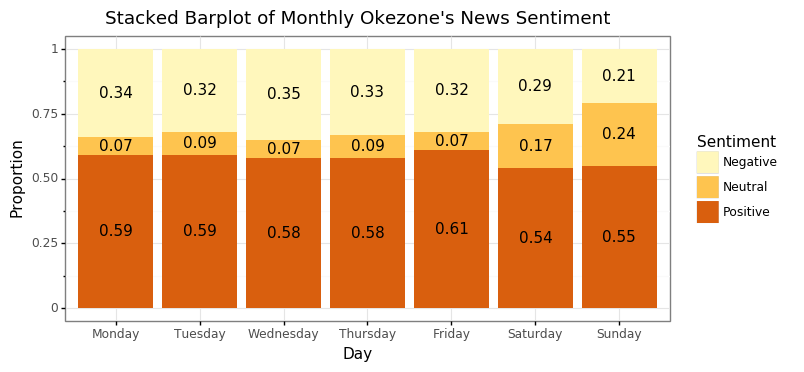

<ggplot: (-9223363290943667645)>

In [189]:
(ggplot(long_okezone,aes(x = 'Day',
                         y = 'value',
                         fill = 'Sentiment'))
 + geom_bar(position = 'fill',
            stat = 'identity')
 + geom_text(aes(label = 'value'),
             position = position_stack(vjust = 0.5))
 + labs(title = "Stacked Barplot of Monthly Okezone's News Sentiment")
 + ylab('Proportion')
 + xlab('Day')
 + xlim('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
 + theme_bw()
 + scale_fill_brewer(palette = 'YlOrBr')
 + theme(legend_title = element_text(),
         legend_direction = 'vertical')
)

#### Kompas

In [190]:
df_long_df_full_raw_kompas = df_long_df_full_raw[df_long_df_full_raw['news'] == 'Kompas']

In [191]:
# Aggregating data according to day variable
agg_data_kompas = df_long_df_full_raw_kompas.groupby(by=['day'],
                                                     as_index = False)['pos','neg','net','total'].agg('sum')

In [192]:
agg_data_kompas.columns = ['Day','Positive','Negative','Neutral','Total']

In [193]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
agg_data_kompas['Day'] = pd.Categorical(agg_data_kompas['Day'],categories=cats,ordered = True)
agg_data_kompas.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,415.0,201.0,139.0,755.0
5,Tuesday,377.0,187.0,113.0,677.0
6,Wednesday,349.0,207.0,120.0,676.0
4,Thursday,398.0,154.0,139.0,691.0
0,Friday,382.0,177.0,124.0,683.0
2,Saturday,126.0,30.0,92.0,248.0
3,Sunday,93.0,35.0,78.0,206.0


In [194]:
# Ratio of sentiments
agg_data_kompas['Positive'] = agg_data_kompas['Positive']/agg_data_kompas['Total']
agg_data_kompas['Negative'] = agg_data_kompas['Negative']/agg_data_kompas['Total']
agg_data_kompas['Neutral'] = agg_data_kompas['Neutral']/agg_data_kompas['Total']
agg_data_kompas.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,0.549669,0.266225,0.184106,755.0
5,Tuesday,0.556869,0.276219,0.166913,677.0
6,Wednesday,0.516272,0.306213,0.177515,676.0
4,Thursday,0.575977,0.222865,0.201158,691.0
0,Friday,0.559297,0.259151,0.181552,683.0
2,Saturday,0.508065,0.120968,0.370968,248.0
3,Sunday,0.451456,0.169903,0.378641,206.0


In [195]:
# Melting the data
agg_data_kompas = agg_data_kompas.drop(['Total'],axis=1)                    # Drop variable of 'total'
long_kompas = pd.melt(agg_data_kompas,id_vars='Day',var_name='Sentiment')   # Melt
long_kompas['value'] = round(long_kompas['value'],2)                        # Round the value
long_kompas.head()

,Day,Sentiment,value
0,Friday,Positive,0.56
1,Monday,Positive,0.55
2,Saturday,Positive,0.51
3,Sunday,Positive,0.45
4,Thursday,Positive,0.58


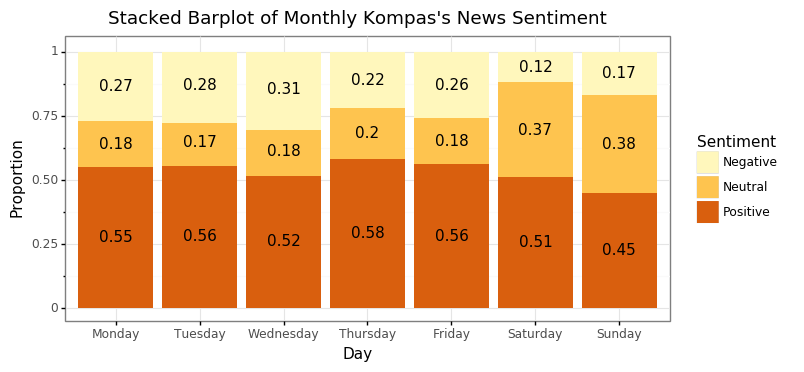

<ggplot: (8745914147918)>

In [196]:
(ggplot(long_kompas,aes(x = 'Day',
                        y = 'value',
                        fill = 'Sentiment'))
 + geom_bar(position = 'fill',
            stat = 'identity')
 + geom_text(aes(label = 'value'),
             position = position_stack(vjust = 0.5))
 + labs(title = "Stacked Barplot of Monthly Kompas's News Sentiment")
 + ylab('Proportion')
 + xlab('Day')
 + xlim('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
 + theme_bw()
 + scale_fill_brewer(palette = 'YlOrBr')
 + theme(legend_title = element_text(),
         legend_direction = 'vertical')
)

#### Detik

In [197]:
df_long_df_full_raw_detik = df_long_df_full_raw[df_long_df_full_raw['news'] == 'Detik']

In [198]:
# Aggregating data according to day variable
agg_data_detik = df_long_df_full_raw_detik.groupby(by=['day'],
                                                   as_index = False)['pos','neg','net','total'].agg('sum')

In [199]:
agg_data_detik.columns = ['Day','Positive','Negative','Neutral','Total']

In [200]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
agg_data_detik['Day'] = pd.Categorical(agg_data_detik['Day'],categories=cats,ordered = True)
agg_data_detik.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,709.0,526.0,279.0,1514.0
5,Tuesday,657.0,495.0,247.0,1399.0
6,Wednesday,662.0,519.0,256.0,1437.0
4,Thursday,690.0,410.0,270.0,1370.0
0,Friday,700.0,447.0,264.0,1411.0
2,Saturday,246.0,119.0,193.0,558.0
3,Sunday,177.0,89.0,163.0,429.0


In [201]:
# Ratio of sentiments
agg_data_detik['Positive'] = agg_data_detik['Positive']/agg_data_detik['Total']
agg_data_detik['Negative'] = agg_data_detik['Negative']/agg_data_detik['Total']
agg_data_detik['Neutral'] = agg_data_detik['Neutral']/agg_data_detik['Total']
agg_data_detik.sort_values('Day',ascending = True)

,Day,Positive,Negative,Neutral,Total
1,Monday,0.468296,0.347424,0.184280,1514.0
5,Tuesday,0.469621,0.353824,0.176555,1399.0
6,Wednesday,0.460682,0.361169,0.178149,1437.0
4,Thursday,0.503650,0.299270,0.197080,1370.0
0,Friday,0.496102,0.316797,0.187101,1411.0
2,Saturday,0.440860,0.213262,0.345878,558.0
3,Sunday,0.412587,0.207459,0.379953,429.0


In [202]:
# Melting the data
agg_data_detik = agg_data_detik.drop(['Total'],axis=1)                    # Drop variable of 'total'
long_detik = pd.melt(agg_data_detik,id_vars='Day',var_name='Sentiment')   # Melt
long_detik['value'] = round(long_detik['value'],2)                        # Round the value
long_detik.head()

,Day,Sentiment,value
0,Friday,Positive,0.50
1,Monday,Positive,0.47
2,Saturday,Positive,0.44
3,Sunday,Positive,0.41
4,Thursday,Positive,0.50


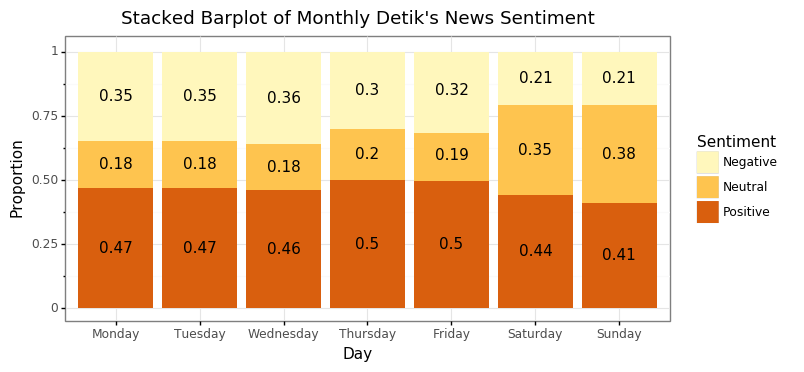

<ggplot: (8745921299376)>

In [203]:
(ggplot(long_detik,aes(x = 'Day',
                       y = 'value',
                       fill = 'Sentiment'))
 + geom_bar(position = 'fill',
            stat = 'identity')
 + geom_text(aes(label = 'value'),
             position = position_stack(vjust = 0.5))
 + labs(title = "Stacked Barplot of Monthly Detik's News Sentiment")
 + ylab('Proportion')
 + xlab('Day')
 + xlim('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
 + theme_bw()
 + scale_fill_brewer(palette = 'YlOrBr')
 + theme(legend_title = element_text(),
         legend_direction = 'vertical')
)

### 4.8 Time Series of Sentiment Ratio

In [218]:
# Aggregating data according to day variable
agg_data_news = df_long_df_full_raw.groupby(by=['day','news'],
                                            as_index = False)['pos','neg','net','total'].agg('sum')

In [219]:
agg_data_news.head()

,day,news,pos,neg,net,total
0,Friday,Detik,700.0,447.0,264.0,1411.0
1,Friday,Kompas,382.0,177.0,124.0,683.0
2,Friday,Okezone,843.0,447.0,91.0,1381.0
3,Monday,Detik,709.0,526.0,279.0,1514.0
4,Monday,Kompas,415.0,201.0,139.0,755.0


In [220]:
ratio = round(agg_data_news['pos']/agg_data_news['neg'],2)
agg_data_news.insert(loc=6,column='ratio',value = ratio)
agg_data_news.head()

,day,news,pos,neg,net,total,ratio
0,Friday,Detik,700.0,447.0,264.0,1411.0,1.57
1,Friday,Kompas,382.0,177.0,124.0,683.0,2.16
2,Friday,Okezone,843.0,447.0,91.0,1381.0,1.89
3,Monday,Detik,709.0,526.0,279.0,1514.0,1.35
4,Monday,Kompas,415.0,201.0,139.0,755.0,2.06


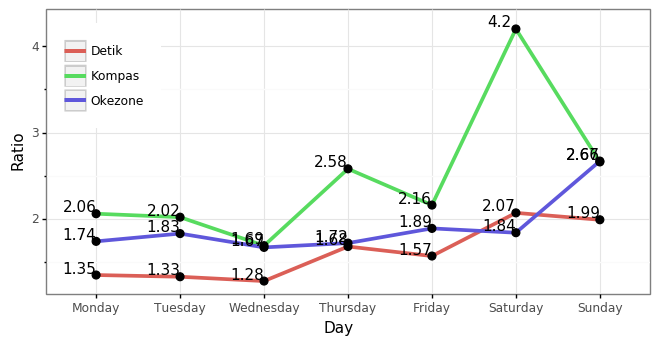

<ggplot: (-9223363290943700280)>

In [245]:
(ggplot(agg_data_news)
 + geom_line(aes(x = 'day',
                 y = 'ratio',
                 color = 'news',
                 group = 'news'),
             size = 1.5)
 + geom_point(aes(x = 'day',
                  y = 'ratio'),
              size = 2.7)
 + geom_text(aes(x = 'day',
                 y = 'ratio',
                 label = 'ratio'),
            nudge_y = 0.08,
            nudge_x = -0.2)
 + ylab('Ratio')
 + xlab('Day')
 + xlim(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
 + theme_bw()
 + theme(legend_title = element_blank(),
         legend_position = (0.2,0.7),
         legend_direction = 'vertical')
)